In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv("C:\\Users\\shashank\\Downloads\\project 1-1\\project 1\\basketball.csv")

In [42]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [43]:
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [44]:
print(df.shape)

(61, 13)


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB
None


In [46]:
df.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [47]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [48]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

### Imputing null values with 0, as dropping will reduce the size of dataset.

Exploratory Data Analysis (EDA) cannot yield accurate conclusions or reveal relationships when the dataset contains missing or encoded data.

We thought of  removing  all records with missing values in any of their attributes. However, this approach may result in the loss of valuable data.


Team 61 doesn't make sense since it's a new team.
Other columns like Tournament champion can be made 0 since only 9 of 61 teams have been Champions.
Only 1 team can be runner up in any given tournament.

In [49]:
df.replace(to_replace='-',value=0,inplace=True)

In [50]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15


In [51]:
df["Score"] = df["Score"].astype("int64")
df["PlayedGames"] = df["PlayedGames"].astype("int64")
df["WonGames"] = df["WonGames"].astype("int64")
df["DrawnGames"] = df["DrawnGames"].astype("int64")
df["LostGames"] = df["LostGames"].astype("int64")
df["BasketScored"] = df["BasketScored"].astype("int64")
df["BasketGiven"] = df["BasketGiven"].astype("int64")
df["TournamentChampion"] = df["TournamentChampion"].astype("int64")
df['Runner-up'] = df['Runner-up'].astype('int64')

In [52]:
df.dtypes

Team                   object
Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion      int64
Runner-up               int64
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [53]:
df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,20.000000


### Keeping the 1st value as the launch year.

In [54]:
def clean_TeamLaunch(val):
        val = val[: 4]
        return int(val)
    
df['TeamLaunch'] = df["TeamLaunch"].apply(clean_TeamLaunch)
df['TeamLaunch'].head()

0    1929
1    1929
2    1929
3    1931
4    1929
Name: TeamLaunch, dtype: int64

In [55]:
df['TeamLaunch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 61 entries, 0 to 60
Series name: TeamLaunch
Non-Null Count  Dtype
--------------  -----
61 non-null     int64
dtypes: int64(1)
memory usage: 616.0 bytes


### Univariate Analysis - To check individual distribution- Skewness

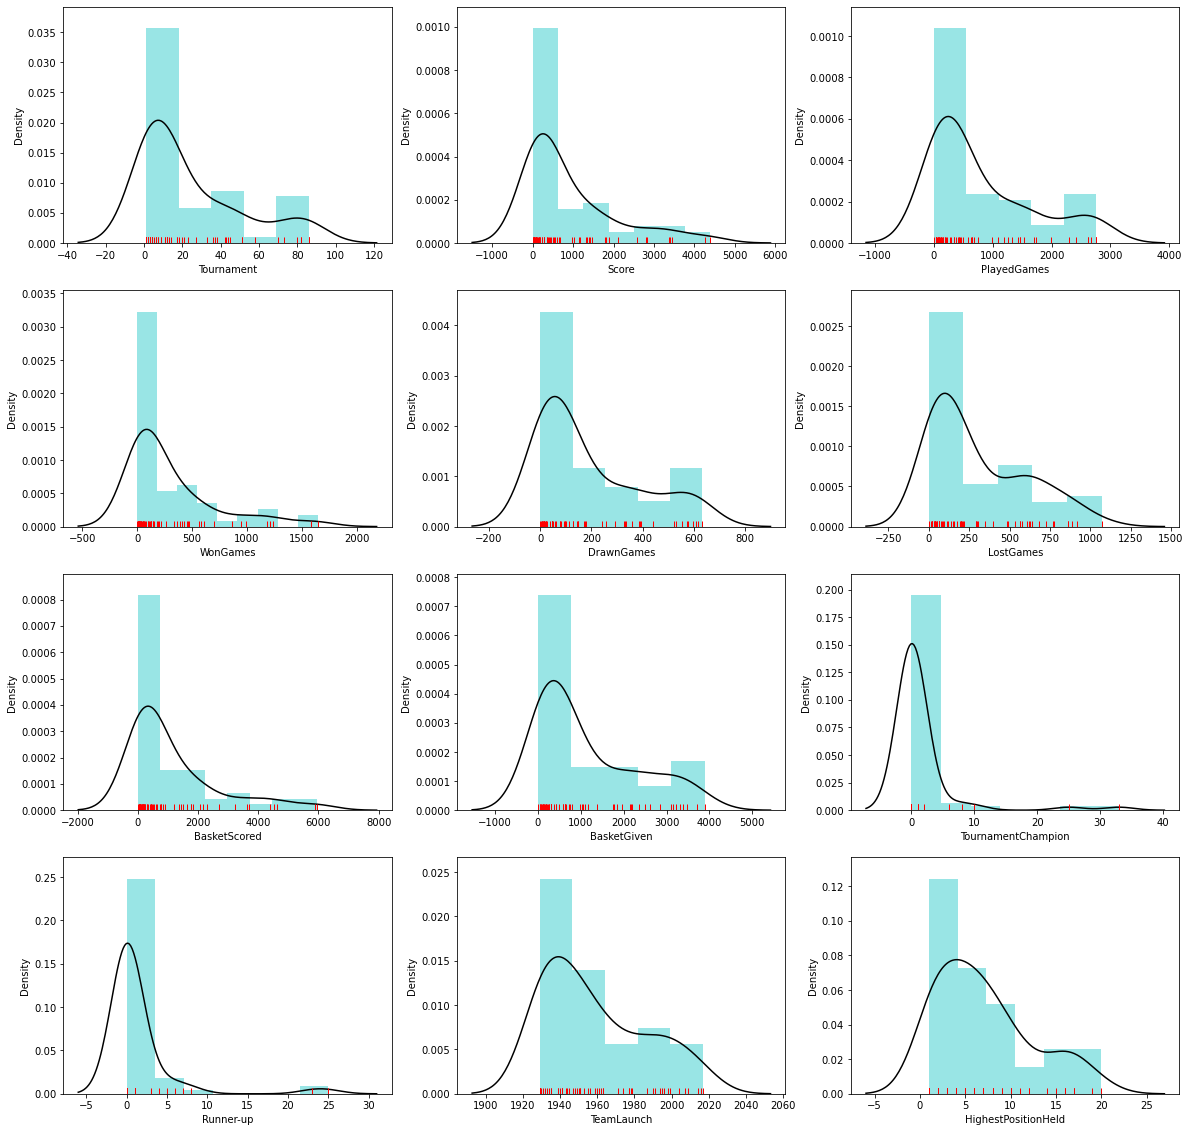

In [66]:
# Check for distribution skewness
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']
plt.figure(figsize=(20,20))
index = 1
for col in df[attrs]:
    plt.subplot(4,3,index)
    sns.distplot(df[col], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})
    index += 1

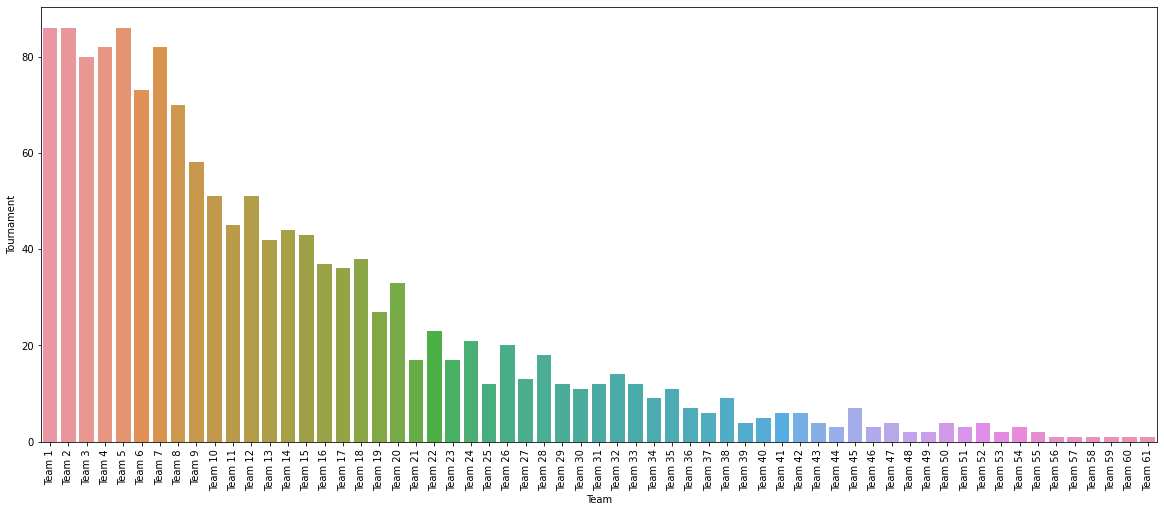

In [69]:
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(df['Team'], df['Tournament'])
plt.xticks(rotation=90)
plt.show()

Not all the teams have played same number of games.

we will be considering the winning,loosing and drawn % because relatively newer teams have played less games so considering on basis of number of matches  will not be a fair parameter.

Lets calculate percentage of games won, lost and drawn by the teams.

In [70]:
df['WonGames_%'] = (df['WonGames']/df['PlayedGames']*100).round(2)


In [71]:
df['LostGames%'] = (df['LostGames']/df['PlayedGames']*100).round(2)

In [72]:
df['DrawGames%'] = (df['DrawnGames']/df['PlayedGames']*100).round(2)

In [73]:
df.head(61)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WonGames_%,LostGames%,DrawGames%
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.63,20.38,19.99
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.24,22.01,20.75
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.48,29.65,22.88
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.56,32.32,23.12
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.77,33.31,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,21.05,52.63,26.32
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16,23.33,50.00,26.67
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16,23.33,60.00,16.67
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,16.67,70.00,13.33


### we have to find the best performing teams so now we will be focusing on individual rows instead of finding patterns in the whole dataset

In [74]:
#details of the top 20 winning teams, also the teams with highest score
df_wongames= df.nlargest(20, ['WonGames'])

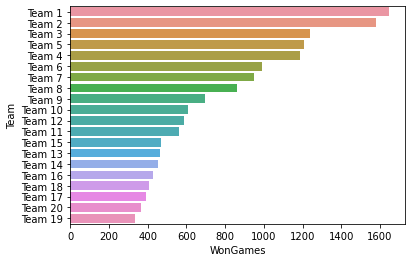

In [75]:
sns.barplot(y=df_wongames['Team'], x= df_wongames['WonGames'])
plt.show()

In [ ]:
#we will find if the teams with max number of matches won also has the max number of baskets scored

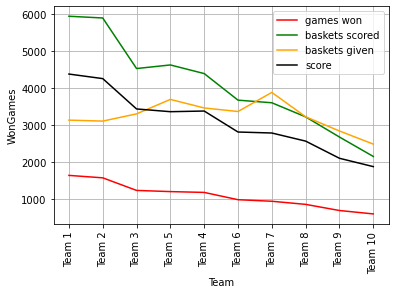

In [76]:
sns.lineplot('Team', 'WonGames', data=df_wongames.head(10), color='red')
sns.lineplot('Team', 'BasketScored', data=df_wongames.head(10), color='green')
sns.lineplot('Team', 'BasketGiven', data=df_wongames.head(10), color='orange')
sns.lineplot('Team', 'Score', data=df_wongames.head(10), color='black')
plt.grid()
plt.xticks(rotation=90)
plt.legend(labels=['games won', 'baskets scored', 'baskets given', 'score'])
plt.show()

## TEAM 1 has the highest score, max games won and baskets scored. Baskets given increases as number of matches won decreases

<AxesSubplot:>

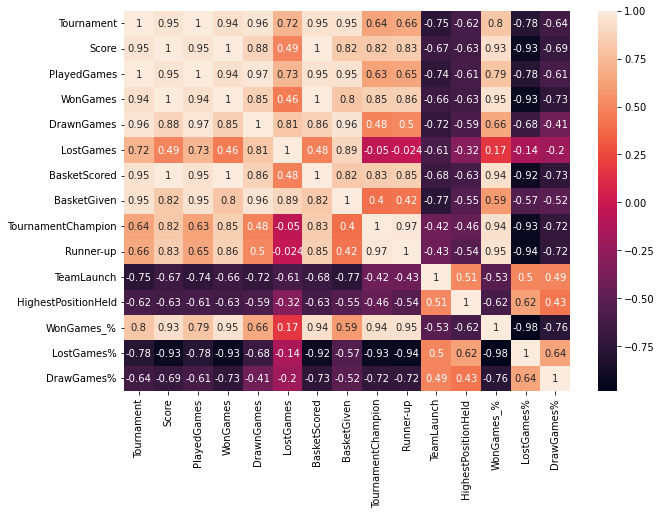

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(df_wongames.corr(), annot=True)


there is a very strong correlation between games won and baskets scored 

### Teams who have been tournament champions for the max number of times.

In [85]:
df.nlargest(10, 'TournamentChampion')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WonGames_%,LostGames%,DrawGames%
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.63,20.38,19.99
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.24,22.01,20.75
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.48,29.65,22.88
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.77,33.31,22.92
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.56,32.32,23.12
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.53,37.40,25.07
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.11,36.84,22.05
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.07,39.47,25.46
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1,36.80,37.58,25.62
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,36.10,40.75,23.15


<AxesSubplot:xlabel='TeamLaunch', ylabel='Team'>

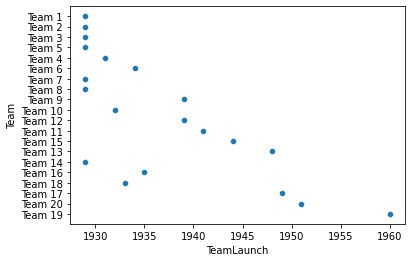

In [86]:
sns.scatterplot( 'TeamLaunch', 'Team', data=df_wongames)

we can see that most of the top winning teams were launched in 1929-60s

In [88]:
df[df['TeamLaunch']>=2000]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WonGames_%,LostGames%,DrawGames%
24,Team 25,12,553,456,147,112,197,520,633,0,0,2004,6,32.24,43.20,24.56
36,Team 37,6,242,228,62,56,110,244,366,0,0,2007,8,27.19,48.25,24.56
43,Team 44,3,132,114,35,27,52,139,167,0,0,2014,10,30.70,45.61,23.68
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016,17,21.05,50.00,28.95
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,21.05,52.63,26.32
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017,9,NaN,NaN,NaN


we can see that only 6 teams were launched after 2000s and their performance is below average so we will be discarding these.

### we can add another column of probability of winning anf loosing a game of each team

In [89]:
x=0
df['prob_win']=0
for x in range(61):
     df['prob_win'].iloc[x]= df['WonGames'].iloc[x]/ df['PlayedGames'].iloc[x]

In [91]:
x=0
df['prob_loose']= 0
for x in range(61):
     df['prob_loose'].iloc[x]= df['LostGames'].iloc[x]/ df['PlayedGames'].iloc[x]

In [92]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WonGames_%,LostGames%,DrawGames%,prob_win,prob_loose
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.63,20.38,19.99,0.596307,0.203838
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.24,22.01,20.75,0.572411,0.220130
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.48,29.65,22.88,0.474751,0.296480
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.56,32.32,23.12,0.445571,0.323198
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.77,33.31,22.92,0.437726,0.333092


### Teams with lowest performance

In [93]:
df_wongames['TeamLaunch'] = df_wongames['TeamLaunch'].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:xlabel='Team', ylabel='LostGames'>

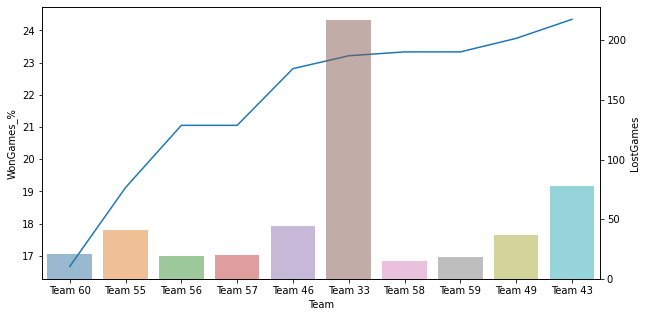

In [97]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,5))

sns.lineplot('Team', 'WonGames_%', data = df.nsmallest(10, 'WonGames_%'))
ax2 = ax1.twinx()
sns.barplot(data = df.nsmallest(10, 'WonGames_%'), x='Team', y='LostGames', alpha=0.5, ax=ax2)

### Teams with highest win%

<AxesSubplot:xlabel='Team', ylabel='TournamentChampion'>

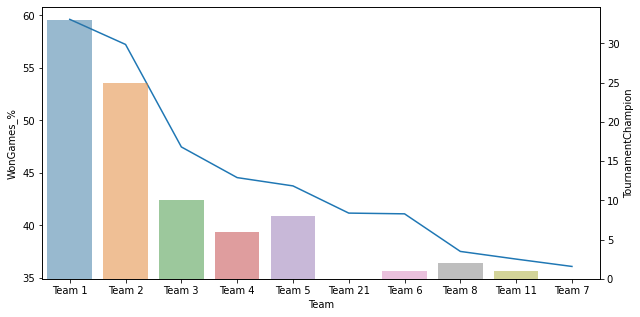

In [98]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,5))

sns.lineplot('Team', 'WonGames_%', data = df.nlargest(10, 'WonGames_%'))

ax2 = ax1.twinx()
sns.barplot(data = df.nlargest(10, 'WonGames_%'), x='Team', y='TournamentChampion', alpha=0.5, ax=ax2)

From the top 20 teams with highest scores, highest matches won, we'll combine it with teams having highest winning % to find the intersecting teams

In [100]:
df_winpercent = df.nlargest(20, 'WonGames_%')

In [101]:
df_winpercent['TeamLaunch']=df_winpercent['TeamLaunch'].apply(pd.to_numeric, errors='coerce')

In [102]:
intersected_df = pd.merge(df_wongames, df_winpercent, how='inner')

In [103]:
intersected_df.sample()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WonGames_%,LostGames%,DrawGames%,prob_win,prob_loose
10,Team 12,51,1789,1698,586,389,723,2278,2624,0,0,1939,4,34.51,42.58,22.91,0.345112,0.425795


<AxesSubplot:xlabel='Team', ylabel='WonGames_%'>

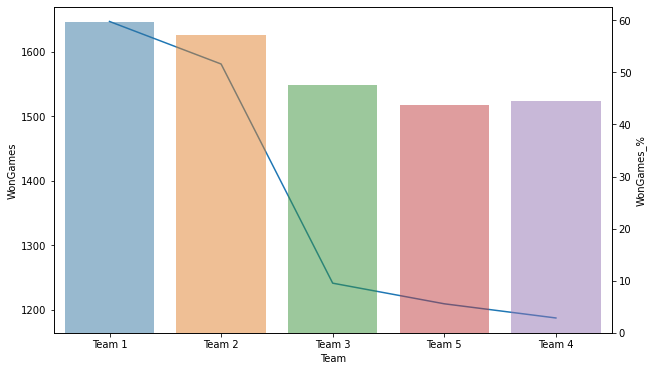

In [105]:
ax1=sns.set_style(style=None, rc=None)
fig,ax1= plt.subplots(figsize=(10,6))

sns.lineplot('Team', 'WonGames', data = intersected_df.head())
ax2 = ax1.twinx()
sns.barplot( x='Team', y='WonGames_%', data= intersected_df.head(), alpha=0.5, ax=ax2)

<AxesSubplot:xlabel='Team', ylabel='baskets'>

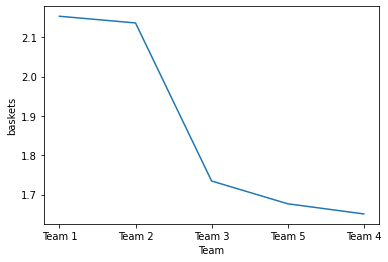

In [113]:
#teams who scored max baskets per game
intersected_df['baskets'] = 0
for i in intersected_df.index:
    intersected_df.loc[i, 'baskets'] = intersected_df.loc[i, 'BasketScored'] / intersected_df.loc[i, 'PlayedGames']

sns.lineplot('Team', 'baskets', data=intersected_df.head(5))

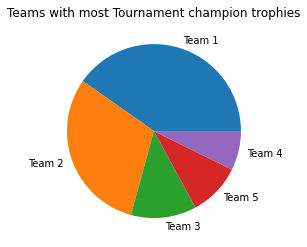

In [114]:
plt.pie(intersected_df['TournamentChampion'].head(), labels= intersected_df['Team'].head())
plt.title('Teams with most Tournament champion trophies')
plt.show()

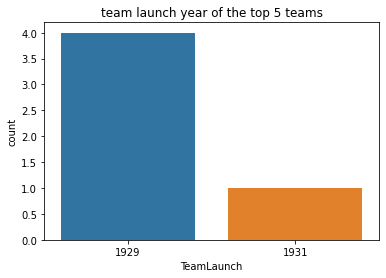

In [115]:
sns.countplot( 'TeamLaunch', data=intersected_df.head())
plt.title('team launch year of the top 5 teams')
plt.show()

Thus, we can approach any of the top 5 teams, TEAM 1,2,3,4,5 for the next matches.

Quality: To avoid mixed data in columns such as TeamLaunch, it would be helpful to include special instructions like "only enter the year of team formation" when adding data.

Quantity:
1. The data extracted is inadequate for peforming more exhaustive analysis.
2. The data needs to have more variables as well as records, 61 entries are inadequate for data exploration.
3. If the data collected is a sample of 61 teams out of a population, then there should be access to population to verify more.
4. For performing data analysis and exploration, a sample of 61 teams is adequate, however if Business and client requires Predictive Modelling then, data is highly inadequate after train-test split.

Velocity:

1. More information would be sufficient.
2. For example information about Team Players, sponsors, performance of Team at home and away from home would be some useful variables.
3. There has to be more diversity in data types as well.
4. More data sources, structured, unstructured, semi-structured or raw data would be helpful.

Variety:
1. The speed at which companies receive, store and manage data.
2. e.g., the specific number of social media posts or search queries received within a day, hour or other unit of time.
3. Efficient speed of data collection can be achieved if we maintain a regular record of games.
4. Data should be incremented for live games.


Veracity:
1. It refers to inconsistencies and uncertainty in data, that is data which is available can sometimes get messy and quality and accuracy are difficult to control.
2. Big Data is also variable because of the multitude of data dimensions resulting from multiple disparate data types and sources.
3. Data in bulk could create confusion whereas less amount of data could convey half or Incomplete Information.
4. Not sure if Team 61 has played many games or data is missing.

Conclusion:
Company X can approach the top 5 teams namely Team 1,2,3,5,4 since they have the highest score, max no of baskets scored, max winning %.